# Import phase

In [4]:
import numpy as np 
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
import time
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
import pandas as pd
from locale import atof, setlocale, LC_NUMERIC

ModuleNotFoundError: No module named 'tslearn'

# Chrome setup

In [ ]:
chrome_options = Options()
chrome_options.add_argument("--incognito")
chrome_options.add_argument("--window-size=1280x720")

# Chrome start

In [ ]:
driver = webdriver.Chrome(service = Service(ChromeDriverManager().install()))

In [ ]:
url_stock_getter = "https://quotes.vcbs.com.vn/a/exchange.html?symbol=HSX"
url_stock_history = "https://www.stockbiz.vn/SearchStocks.aspx"
driver.get(url_stock_getter)
time.sleep(5)

In [ ]:
stock_symbol_location = "/html/body/div[5]/table/tbody/tr/td[4]"
elements = driver.find_elements(By.XPATH, stock_symbol_location)

In [ ]:
symbol_list = []
for element in elements:
    symbol_list.append(element.text)

In [ ]:
print(symbol_list)

['AAA', 'AAM', 'AAT', 'ABR', 'ABS', 'ABT', 'ACB', 'ACC', 'ACG', 'ACL', 'ADG', 'ADS', 'AGG', 'AGM', 'AGR', 'AMD', 'ANV', 'APC', 'APG', 'APH', 'ASG', 'ASM', 'ASP', 'AST', 'BAF', 'BBC', 'BCE', 'BCG', 'BCM', 'BFC', 'BHN', 'BIC', 'BID', 'BKG', 'BMC', 'BMI', 'BMP', 'BRC', 'BSI', 'BTP', 'BTT', 'BVH', 'BWE', 'C32', 'C47', 'CAV', 'CCI', 'CCL', 'CDC', 'CHP', 'CIG', 'CII', 'CKG', 'CLC', 'CLL', 'CLW', 'CMG', 'CMV', 'CMX', 'CNG', 'COM', 'CRC', 'CRE', 'CSM', 'CSV', 'CTD', 'CTF', 'CTG', 'CTI', 'CTR', 'CTS', 'CVT', 'D2D', 'DAG', 'DAH', 'DAT', 'DBC', 'DBD', 'DBT', 'DC4', 'DCL', 'DCM', 'DGC', 'DGW', 'DHA', 'DHC', 'DHG', 'DHM', 'DIG', 'DLG', 'DMC', 'DPG', 'DPM', 'DPR', 'DQC', 'DRC', 'DRH', 'DRL', 'DSN', 'DTA', 'DTL', 'DTT', 'DVP', 'DXG', 'DXS', 'DXV', 'EIB', 'ELC', 'EMC', 'EVE', 'EVF', 'EVG', 'FCM', 'FCN', 'FDC', 'FIR', 'FIT', 'FLC', 'FMC', 'FPT', 'FRT', 'FTS', 'GAB', 'GAS', 'GDT', 'GEG', 'GEX', 'GIL', 'GMC', 'GMD', 'GMH', 'GSP', 'GTA', 'GVR', 'HAG', 'HAH', 'HAI', 'HAP', 'HAR', 'HAS', 'HAX', 'HBC', 'HCD'

In [ ]:
driver.get(url_stock_history)
time.sleep(5)

In [ ]:
close_ads_button = driver.find_elements(By.XPATH, "/html/body/div[2]/div/div[1]/div/button")
if len(close_ads_button) != 0:
    close_ads_button[0].click()

In [ ]:
def searchStockSymbol(stock_symbol):
    driver.get(url_stock_history)
    time.sleep(5)
    close_ads_button = driver.find_elements(By.XPATH, "/html/body/div[2]/div/div[1]/div/button")
    if len(close_ads_button) != 0:
        close_ads_button[0].click()
    search_stock_symbol_input = driver.find_element(By.XPATH, "/html/body/form/table[2]/tbody/tr/td/div/div[2]/table/tbody/tr/td/table/tbody/tr[1]/td/table/tbody/tr/td/div[1]/div[2]/div[1]/div/input")
    search_stock_symbol_input.send_keys(stock_symbol)
    search_stock_symbol_button = driver.find_element(By.XPATH, "/html/body/form/table[2]/tbody/tr/td/div/div[2]/table/tbody/tr/td/table/tbody/tr[1]/td/table/tbody/tr/td/div[1]/div[2]/div[1]/div/div/input")
    search_stock_symbol_button.click()
    history_button = driver.find_element(By.XPATH, "/html/body/form/table[2]/tbody/tr/td/div/div[2]/div[1]/table/tbody/tr/td/table/tbody/tr[1]/td/table/tbody/tr/td/div/div[3]/ul/li[7]/a")
    history_button.click()
    iframe = driver.find_elements(By.XPATH,"/html/ins/div/iframe")
    if len(iframe) != 0:
        driver.switch_to.frame(iframe[0])
        iframe2 = driver.find_element(By.XPATH, "/html/body/div/div/div[2]/iframe")
        driver.switch_to.frame(iframe2)
        close_ads_button = driver.find_element(By.ID,"dismiss-button")
        close_ads_button.click()
        driver.switch_to.default_content()
    start_day_input = driver.find_element(By.XPATH, "/html/body/form/table[2]/tbody/tr/td/div/div[2]/table/tbody/tr/td/table/tbody/tr[2]/td/table/tbody/tr/td/div/div[4]/div[1]/table/tbody/tr/td[2]/table/tbody/tr/td[1]/input[3]")
    start_day_input.send_keys("01/01/2020")
    find_button = driver.find_element(By.XPATH, "/html/body/form/table[2]/tbody/tr/td/div/div[2]/table/tbody/tr/td/table/tbody/tr[2]/td/table/tbody/tr/td/div/div[4]/div[1]/table/tbody/tr/td[5]/input")
    find_button.click()

In [ ]:
def takeSymbolPrice():
    next_button = driver.find_elements(By.XPATH, "/html/body/form/table[2]/tbody/tr/td/div/div[2]/table/tbody/tr/td/table/tbody/tr[2]/td/table/tbody/tr/td/div/div[4]/div[2]/div[2]/a[last()]")
    prices_list = []
    day_list = []
    while len(next_button) != 0 and next_button[0].text == "Tiếp »":
        prices = driver.find_elements(By.XPATH, "/html/body/form/table[2]/tbody/tr/td/div/div[2]/table/tbody/tr/td/table/tbody/tr[2]/td/table/tbody/tr/td/div/div[4]/div[2]/table/tbody/tr/td[6]")
        days = driver.find_elements(By.XPATH, "/html/body/form/table[2]/tbody/tr/td/div/div[2]/table/tbody/tr/td/table/tbody/tr[2]/td/table/tbody/tr/td/div/div[4]/div[2]/table/tbody/tr/td[1]")
        for index in range(len(days)):
            prices_list.append(prices[index].text)
            day_list.append(days[index].text)
        next_button[0].click()
        time.sleep(3)
        next_button = driver.find_elements(By.XPATH, "/html/body/form/table[2]/tbody/tr/td/div/div[2]/table/tbody/tr/td/table/tbody/tr[2]/td/table/tbody/tr/td/div/div[4]/div[2]/div[2]/a[last()]")
    prices = driver.find_elements(By.XPATH, "/html/body/form/table[2]/tbody/tr/td/div/div[2]/table/tbody/tr/td/table/tbody/tr[2]/td/table/tbody/tr/td/div/div[4]/div[2]/table/tbody/tr/td[6]")
    days = driver.find_elements(By.XPATH, "/html/body/form/table[2]/tbody/tr/td/div/div[2]/table/tbody/tr/td/table/tbody/tr[2]/td/table/tbody/tr/td/div/div[4]/div[2]/table/tbody/tr/td[1]")
    for index in range(len(days)):
        prices_list.append(prices[index].text)
        day_list.append(days[index].text)
    return day_list, prices_list

In [ ]:
def dataCrawling(stock_symbol_list):
    datacrawled = dict()
    for i in stock_symbol_list:
        searchStockSymbol(i)
        time.sleep(3)
        days, prices = takeSymbolPrice()
        datacrawled[i] = pd.Series(prices, index=days)
    df = pd.DataFrame(datacrawled)
    return df

In [ ]:
symbol_list = symbol_list[100:200]
df = dataCrawling(symbol_list)
df.index = pd.to_datetime(df.index, dayfirst=True)
df = df.sort_index()
df.to_csv('data.csv')

NameError: name 'symbol_list' is not defined

In [ ]:
df = pd.read_csv('out.csv', index_col=0)

In [ ]:
print(df)

              DTL    DTT    DVP    DXG    DXS   DXV    EIB    ELC    EMC  \
2021-02-01  12,30  12,50  42,35  18,25    NaN  3,90  17,50   9,34  16,00   
2021-03-01  12,30  12,50  47,40  23,85    NaN  4,33  18,45  11,35  15,05   
2022-03-01  47,80  13,00  60,00  43,20  39,75  7,40  33,85  24,00  19,70   
2020-04-01  18,10  12,20  28,30   7,77    NaN  2,68  15,20   4,18  12,00   
2021-04-01  13,00  13,00  47,00  24,60    NaN  4,40  20,30  13,70  21,80   
...           ...    ...    ...    ...    ...   ...    ...    ...    ...   
2021-08-31  34,80  14,00  56,50  22,20    NaN  4,16  25,35  19,70  18,60   
2022-08-31  26,60  13,25  52,60  26,50  20,55  6,05  30,35  15,80  17,05   
2022-10-31  20,90  12,60  48,90  14,00   7,91  4,71  37,00   8,00  16,25   
2020-12-31  10,90  12,50  46,80  15,95    NaN  3,70  19,25   9,29  19,45   
2021-12-31  45,00  17,30  60,30  35,00  37,30  8,40  33,70  25,80  17,35   

              EVE  ...    KSB    L10    LAF    LBM    LCG    LDG    LEC  \
2021-02-01  

In [ ]:
df.index = pd.to_datetime(df.index, dayfirst=True)
df = df.sort_index()
df.to_csv('data.csv')
print(df)

              DTL    DTT    DVP    DXG   DXS   DXV    EIB   ELC    EMC    EVE  \
2020-01-02  23,10  13,50  36,40  14,30   NaN  3,48  17,70  6,20  14,10  10,75   
2020-01-03  23,10  13,50  36,50  13,90   NaN  3,52  17,25  6,35  14,90  10,50   
2020-01-06  24,70  13,50  36,50  13,70   NaN  3,29  17,50  6,40  14,90  10,70   
2020-01-07  26,10  13,50  36,35  13,90   NaN  3,48  17,45  6,49  15,70  10,65   
2020-01-08  25,00  13,50  36,00  13,30   NaN  3,48  17,30  6,50  16,30  10,55   
...           ...    ...    ...    ...   ...   ...    ...   ...    ...    ...   
2022-12-14  26,50  11,15  45,00  14,15  6,99  4,28  27,20  9,61  12,00  14,20   
2022-12-15  26,20  11,15  45,05  15,10  6,90  4,30  28,00  9,48  12,55  14,80   
2022-12-16  26,20  11,90  45,25  15,10  6,69  4,40  27,40  9,30  11,70  14,80   
2022-12-19  26,20  11,90  45,30  14,10  6,40  4,45  27,90  9,25  11,70  14,10   
2022-12-20  26,60  11,90  45,40  13,40  6,20  4,41  28,50  8,61  12,40  14,20   

            ...    KSB    L

In [ ]:
def dataset_preparation(dataframe, symbols):
    dataset = dataframe[symbols].values
    for i in range(len(dataset)):
        dataset[i] = float(dataset[i].replace(',','.'))
    return dataset

In [ ]:
FPT_dataset = dataset_preparation(df, 'FPT')
print(FPT_dataset)

[58.6 57.6 57.0 58.1 56.8 57.6 57.5 57.1 57.0 57.0 58.0 57.6 57.4 55.5
 56.5 54.7 52.0 51.5 51.8 52.0 53.6 53.3 52.6 53.6 54.1 54.3 54.5 54.2
 56.0 55.7 55.8 54.7 52.5 54.0 55.0 56.0 55.1 55.7 55.9 55.5 54.6 54.0
 50.3 51.7 50.8 48.1 48.15 47.6 48.5 48.4 47.7 47.7 44.4 44.5 46.0 44.2
 43.1 40.4 41.1 42.3 44.6 47.5 47.3 46.85 46.85 46.4 46.5 49.5 50.1 50.3
 51.2 51.3 49.3 51.1 51.0 51.0 50.7 50.7 50.8 50.5 50.9 52.9 53.5 53.7
 54.0 54.4 49.35 48.7 48.0 48.35 49.25 48.9 49.3 48.45 48.45 48.8 48.0
 48.0 47.95 48.3 48.0 48.65 48.4 48.7 49.35 48.95 48.8 46.0 47.0 46.0 46.6
 46.35 46.6 47.0 47.0 47.55 47.2 46.8 46.85 46.05 45.65 46.2 46.15 46.25
 46.8 47.45 47.7 48.35 47.8 48.65 48.55 48.6 48.6 48.1 47.4 47.8 47.4
 47.75 45.9 43.7 45.7 44.55 45.15 44.5 45.9 46.55 47.0 46.8 47.1 47.2 47.0
 47.5 47.95 47.8 47.0 46.85 46.85 47.05 47.4 48.45 48.85 48.4 49.85 49.9
 49.5 49.9 50.4 50.0 48.5 49.5 49.2 49.2 49.15 49.3 50.0 50.5 50.0 51.2
 51.2 51.3 51.1 50.5 50.8 51.1 50.2 50.0 50.8 50.3 50.5 50.5 5

In [ ]:
def scaler_dataset(dataset):
    scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)
    dataset = dataset.reshape(1,-1)
    dataset = scaler.fit_transform(dataset)
    return dataset

In [ ]:
FPT_dataset_scaled = scaler_dataset(FPT_dataset)
FPT_dataset_scaled = FPT_dataset_scaled.reshape(-1)
print(FPT_dataset_scaled)

[[[-0.84570207]
  [-0.89640769]
  [-0.92683106]
  [-0.87105488]
  [-0.93697218]
  [-0.89640769]
  [-0.90147825]
  [-0.92176049]
  [-0.92683106]
  [-0.92683106]
  [-0.87612544]
  [-0.89640769]
  [-0.90654881]
  [-1.00288948]
  [-0.95218386]
  [-1.04345397]
  [-1.18035912]
  [-1.20571193]
  [-1.19050025]
  [-1.18035912]
  [-1.09923014]
  [-1.11444183]
  [-1.14993576]
  [-1.09923014]
  [-1.07387734]
  [-1.06373621]
  [-1.05359509]
  [-1.06880677]
  [-0.97753667]
  [-0.99274835]
  [-0.98767779]
  [-1.04345397]
  [-1.15500632]
  [-1.0789479 ]
  [-1.02824228]
  [-0.97753667]
  [-1.02317172]
  [-0.99274835]
  [-0.98260723]
  [-1.00288948]
  [-1.04852453]
  [-1.0789479 ]
  [-1.26655867]
  [-1.19557081]
  [-1.24120586]
  [-1.37811102]
  [-1.37557574]
  [-1.40346382]
  [-1.35782877]
  [-1.36289933]
  [-1.39839326]
  [-1.39839326]
  [-1.56572179]
  [-1.56065123]
  [-1.48459281]
  [-1.57586291]
  [-1.63163909]
  [-1.76854424]
  [-1.73305031]
  [-1.67220358]
  [-1.55558066]
  [-1.40853439]
  [-1.41

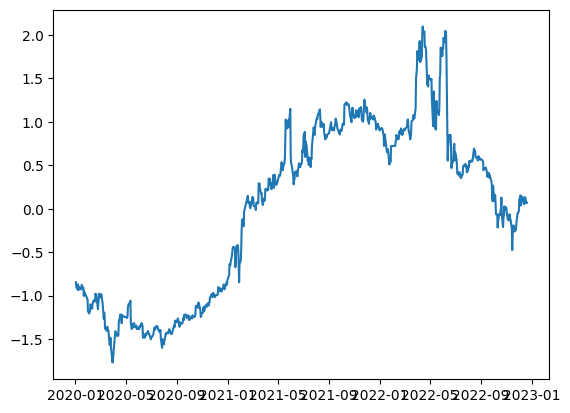

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
five_symbols = ['IBC', 'HDB', 'ITD', 'HPG', 'FPT']
print(df['FPT'].to_list())

[58.6, 57.6, 57.0, 58.1, 56.8, 57.6, 57.5, 57.1, 57.0, 57.0, 58.0, 57.6, 57.4, 55.5, 56.5, 54.7, 52.0, 51.5, 51.8, 52.0, 53.6, 53.3, 52.6, 53.6, 54.1, 54.3, 54.5, 54.2, 56.0, 55.7, 55.8, 54.7, 52.5, 54.0, 55.0, 56.0, 55.1, 55.7, 55.9, 55.5, 54.6, 54.0, 50.3, 51.7, 50.8, 48.1, 48.15, 47.6, 48.5, 48.4, 47.7, 47.7, 44.4, 44.5, 46.0, 44.2, 43.1, 40.4, 41.1, 42.3, 44.6, 47.5, 47.3, 46.85, 46.85, 46.4, 46.5, 49.5, 50.1, 50.3, 51.2, 51.3, 49.3, 51.1, 51.0, 51.0, 50.7, 50.7, 50.8, 50.5, 50.9, 52.9, 53.5, 53.7, 54.0, 54.4, 49.35, 48.7, 48.0, 48.35, 49.25, 48.9, 49.3, 48.45, 48.45, 48.8, 48.0, 48.0, 47.95, 48.3, 48.0, 48.65, 48.4, 48.7, 49.35, 48.95, 48.8, 46.0, 47.0, 46.0, 46.6, 46.35, 46.6, 47.0, 47.0, 47.55, 47.2, 46.8, 46.85, 46.05, 45.65, 46.2, 46.15, 46.25, 46.8, 47.45, 47.7, 48.35, 47.8, 48.65, 48.55, 48.6, 48.6, 48.1, 47.4, 47.8, 47.4, 47.75, 45.9, 43.7, 45.7, 44.55, 45.15, 44.5, 45.9, 46.55, 47.0, 46.8, 47.1, 47.2, 47.0, 47.5, 47.95, 47.8, 47.0, 46.85, 46.85, 47.05, 47.4, 48.45, 48.85, 